In [111]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray

Tabelle erstellen:

In [112]:
md = pd.read_csv('tables/md.csv')
md1 = md.iloc[:, [0,1]]
print(md1.to_latex(index = False, column_format= "c c", decimal=',')) 

\begin{tabular}{c c}
\toprule
 U/V &     n \\
\midrule
 330 & 11649 \\
 340 & 11928 \\
 350 & 12322 \\
 360 & 12488 \\
 370 & 12538 \\
 380 & 12482 \\
 390 & 12726 \\
 400 & 12510 \\
 410 & 12494 \\
 420 & 12678 \\
 430 & 12718 \\
 440 & 12487 \\
 450 & 12825 \\
 460 & 12824 \\
 470 & 12850 \\
 480 & 12862 \\
 490 & 12962 \\
 500 & 12882 \\
 510 & 12815 \\
 520 & 12954 \\
 530 & 12922 \\
 540 & 12996 \\
 550 & 12914 \\
 560 & 12854 \\
 570 & 12916 \\
 580 & 12931 \\
 590 & 13047 \\
 600 & 13003 \\
 610 & 12837 \\
 620 & 12718 \\
 630 & 13000 \\
 640 & 12967 \\
 650 & 13132 \\
 660 & 13129 \\
 670 & 13269 \\
 680 & 13438 \\
 690 & 13413 \\
 700 & 13552 \\
\bottomrule
\end{tabular}



#### Aufgabenteil a)

Daten auswerten:

In [113]:
np.savetxt('tables/a.txt', md1.values, header='f/Hz U/V', fmt='%.3f')
U, N = np.genfromtxt('tables/a.txt', unpack=True, skip_header=1)
# Plateaubereich 380 - 620 V
Up = U[5:30]
Np = N[5:30]

# Ausgleichsgerade
def g(u, a, b):
    return a * u + b

para, pcov = curve_fit(g, Up, Np)
a, b = para
pcov = sqrt(np.diag(pcov))
fa, fb = pcov 

Fehler berechnen:

In [114]:
ua = ufloat(a, fa)
ub = ufloat(b, fb)
print('a = (%.3f ± %.3f)' % (noms(ua), stds(ua)))
print('b = (%.3f ± %.3f)' % (noms(ub), stds(ub)))

a = (1.612 ± 0.337)
b = (12002.203 ± 170.080)


Plot erstellen:

(11500.0, 13800.0)

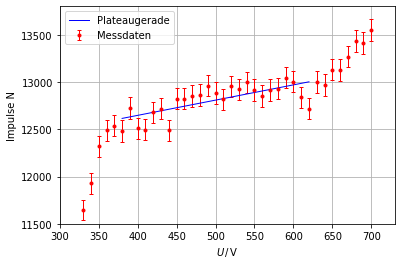

In [115]:

#plt.plot(N, U, 'xr', markersize=6 , label = 'Messdaten', alpha=0.5)
xx = np.linspace(380, 620, 10000)
# N Poisson-verteilt
dN = sqrt(N)
plt.errorbar(U, N, yerr = dN, fmt='r.', elinewidth = 1, capsize = 2, label = 'Messdaten')
plt.plot(xx, g(xx, a, b), '-b', linewidth = 1, label = 'Plateaugerade')

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'Impulse N')
plt.legend(loc="best")                  # legend position
plt.grid(True)                          # grid style
plt.xlim(300, 730)                      # limitation of visible scale in plot
plt.ylim(11500, 13800)

Güte des Geiger-Müller-Zählrohrs in % pro 100 V:

In [116]:
M = (1 - (ua * 400 + ub)/(ua * 500 + ub))*100
print('M = (%.3f ± %.3f)' % (noms(M), stds(M)))

M = (1.259 ± 0.247)


#### Aufgabenteil c)
Bestimmung der Tot-Zeit (Zwei-Quellen-Methode):

In [135]:
def T(n1, n2, n12):
    return (n1 + n2 - n12)/(2*n1*n2)

# Zählraten und Poissonfehler der Quellen
t = 120      # Integrationszeit ind s

N1 = 96941
fN1 = sqrt(N1)
uN1 = ufloat(N1, fN1)
uN1 = uN1/t
print(fN1)

N2 = 76518
fN2 = sqrt(N2)
uN2 = ufloat(N2, fN2)
uN2 = uN2/t
print(fN2)

N12 = 158479
fN12 = sqrt(N12)
uN12 = ufloat(N12, fN12)
uN12 = uN12/t
print(fN12)

# Totzeit berechnen
T = T(uN1, uN2, uN12)
print('T =', T*1e6, 'μs')


311.35349684883903
276.6188713735923
398.09420995538227
T = 121+/-4 μs
